# Speech-Drive Gesture Generation

Paper gốc: BEAT: A Large-Scale Semantic and Emotional Multi-Modal Dataset for Conversational Gestures Synthesis

(https://arxiv.org/abs/2203.05297)

Paper *survey* chính: The GENEA Challenge 2022: A large evaluation of data-driven co-speech gesture generation

(https://arxiv.org/abs/2208.10441)

#### Các tài liệu thực hiện :

* Overleaf Latex luận văn: https://www.overleaf.com/read/gjsmdtccqbkd

* Excel so sánh các phương pháp: https://studenthcmusedu-my.sharepoint.com/:x:/g/personal/21c11029_student_hcmus_edu_vn/Ea0GYz35caFFjCVGFa4JND8BTftkz18Qu8sOgRR4ZwtlVg?e=bdqlXE

* Powerpoint trình bày: https://studenthcmusedu-my.sharepoint.com/:p:/g/personal/21c11029_student_hcmus_edu_vn/ERDCy-YweBJIgZtTLqH-WvoBQnLRhyAXgTI1JN9zQYrQ_Q?e=Yz6Ybg

* Github:

    * Report: https://github.com/hmthanh/master_thesis

    * Source code: https://github.com/hmthanh/BEAT

* Kaggle: https://www.kaggle.com/code/hmthanh/aemi-ai-speech-driven-gesture-generation/

* Website thử nghiệm: https://hmthanh.github.io/3d-human-model/

* PaperWithCodes: https://paperswithcode.com/task/gesture-generation


#### Hướng cải tiến để viết paper:

1. Collect dataset mới từ các buổi Ted talk Tiếng Việt và training trên bộ Dataset mới.

(Mô hình hiện tại đang training trên Tiếng Anh và tiếng Trung)

2. Sử dụng các phương pháp cải tiến trong Deep learning để training tốt hơn như Hard negative mining, thêm hoặc điều chỉnh các tham số để cải tiến mô hình...

3. Kết hợp thêm mã nguồn của mô hình DeepPhase (hiện đang là mô hình tốt nhất và có kết quả đáng kinh ngạc) https://www.youtube.com/watch?v=wNqpSk4FhSw 
Hiện tại DeepMotion chỉ học dựa trên chuyển động trên không gian đa tạp.

3. [Hướng rất khó] Có thể cải tiến bằng cách training mô hình sinh cử chỉ thêm một input nữa đó là dựa trên constant dáng người vật lý, tức khi sinh dáng người thì dựa trên các cơ có sẵn và chuyển động mới phụ thuộc vào các CƠ dáng người trước đó.

(Hiện tại có một bài báo đã nghiên cứu về cách mô phỏng Cơ trên cơ thể người trong 3D:
https://www.youtube.com/watch?v=higGxGmwDbs
Code: https://github.com/hmthanh/viper)

4. [Hướng rất khó] Tìm hiểu cách cơ chế hoạt động của Reinforcement Learning from Human Feedback (RLHF) để có thể fine-tine lại mô hình khi 

5. [Hướng rất khó, có thể phát triển sau này] Team bên trường ĐH Thượng Hải họ scan 3D MRI và mô phỏng các cơ và tạo ra một bàn tay hoàn toàn giống như thật:  https://github.com/reyuwei/NIMBLE_model. Có thể nghiên cứu sâu hơn về cơ người để tạo tạo từ dữ liệu Scan 3D MRI.
(https://github.com/reyuwei/PIANO_model)


#### Thông tin bổ sung về phần ứng dụng sau khi sinh được mô hình :

1. Việc scan và chuyển một người để render như thực tế hoàn toàn khả thi:
Đã có những hướng dẫn và data có sẵn.
https://vgl.ict.usc.edu/Data/DigitalEmily2/

2. *Ozz* là một framework để tối ưu hóa cho việc render trên web nên hoàn toàn có thể load một mô hình người lên web để render.
http://guillaumeblanc.github.io/ozz-animation/samples/playback/

(Github: https://github.com/guillaumeblanc/ozz-animation)

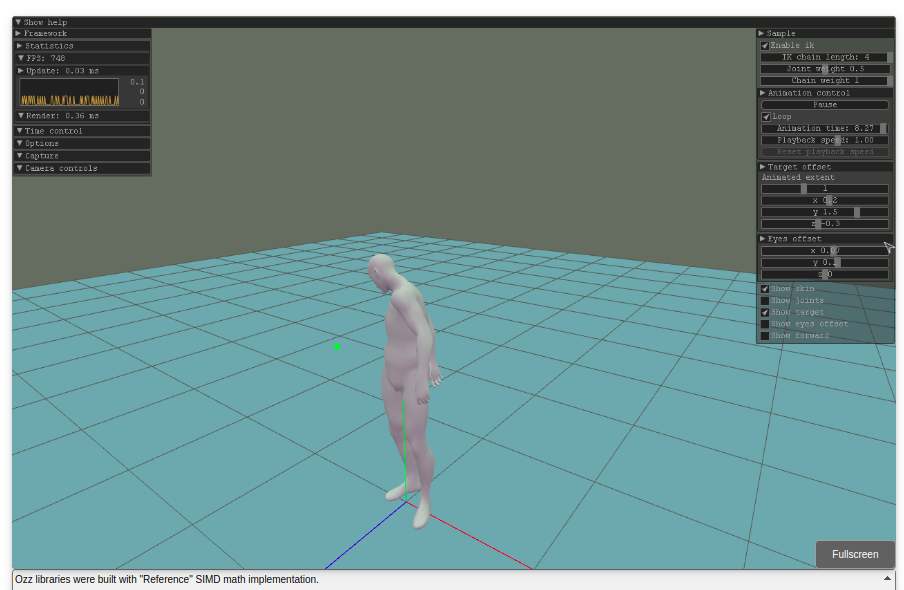



3. Có rất nhiều thư viện có mã nguồn sẵn trên trình duyệt, nên việc render trên trình duyệt hoàn toàn khả thi và có thể xây dựng một thư viện production.

* WARP: dùng để mô phỏng quần áo: https://github.com/hmthanh/warp

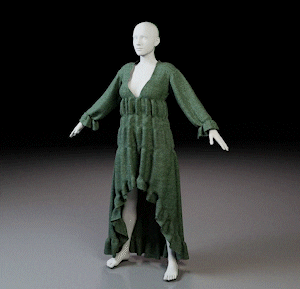

* NVIDIA opensource PhysicX dùng cho các mô phỏng các hiệu ứng vật lý: https://github.com/NVIDIAGameWorks/PhysX



4. Tiềm năng ứng dụng thực tế, và nhu cầu hiện này về phát triển Emotion là rất cao do nó sẽ thay đổi toàn bộ ngành công nghiệp game.
(https://www.youtube.com/watch?v=YhH4PYEkVnY)

Như trước đây
* Traditional : Motion Capture (capture bằng các keypoint như trong hậu kỳ avatar)  -> Đánh số cho từng motion -> Khi cần motion nào thì sẽ lookup trong database -> Mathing thì play motion có trong Database.

* Mới AI/ML : Motion Capture -> training model sinh Motion -> Dùng model để sinh ra motion.




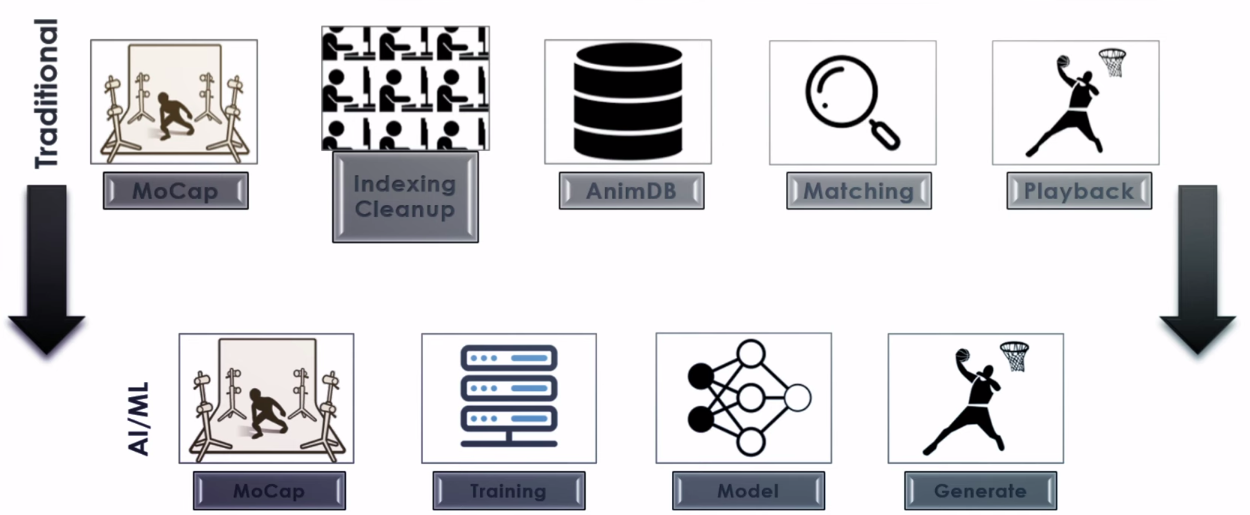

### 0. Motivation


Hiện nay đã có các hệ thống chatbot NLP rất tốt (ChatGPT, Siri, Alexa), nhưng chưa có 1 visual người ảo.
Tức đã có input (audio/text) sang output (text). Nhưng chưa có từ text sang 1 visual.
Để xây dựng 1 virtual human assitant mà tương tác được cần sinh ra Output:
- Hình ảnh: 
    - text to visual: 3D scan da người, các texture, mesh và quan trọng nhất là cử chỉ của người đó.
- Âm thanh: 
    - text to speech.

#### 1. Hình ảnh 

Với da người texture và mesh đã có R3DS Wrap4D(russian3dscanner.com) có thể scan texture của toàn bộ khuôn mặt và cơ thể.
và có thể tích hợp với iClone7

https://www.youtube.com/watch?v=0VnBYRz8jc0


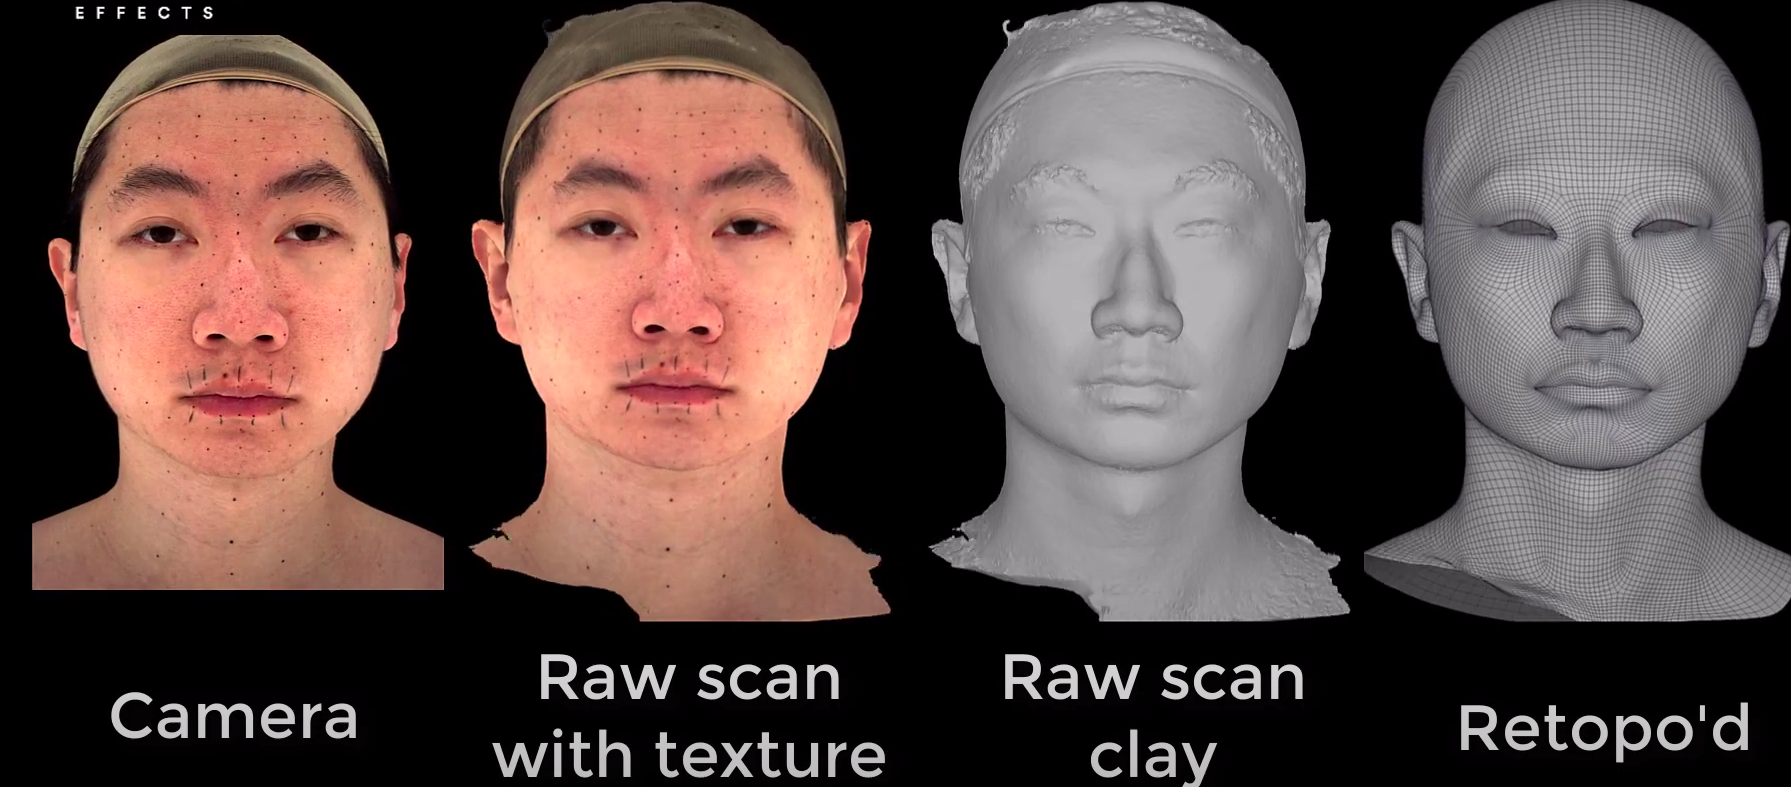



Có rất nhiều 3d scan texture được bán sẵn trên 3dscanstore

https://www.3dscanstore.com/retopologised-body-models/animation-ready-body-scans/animation-ready-body-scan-male-11

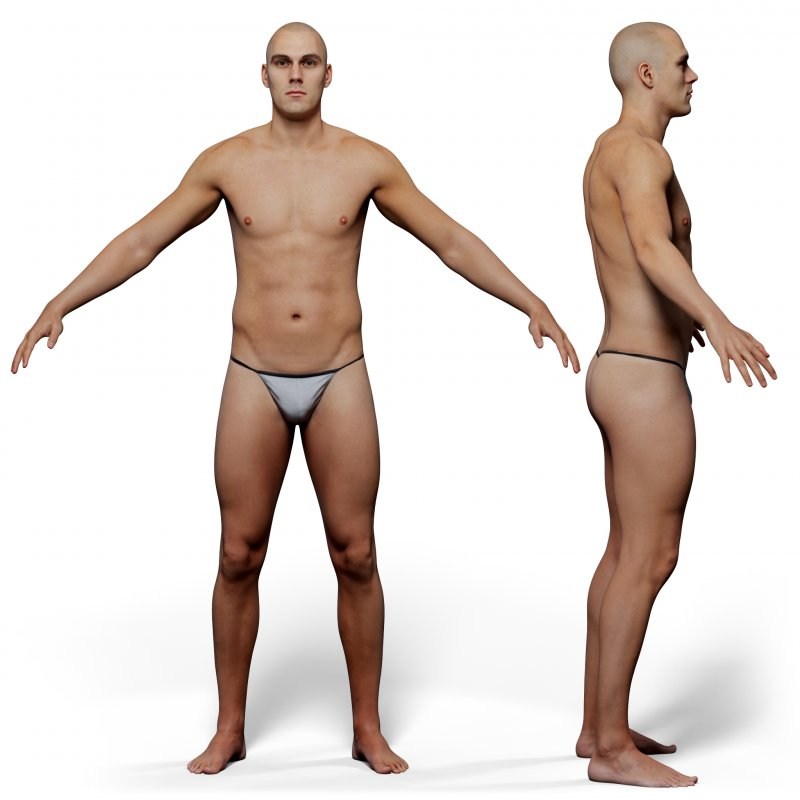

#### 2. Âm thanh


Với cử chỉ tương ứng với từng đoạn text thì gồm có cử chỉ của khuôn mặt (đã có Omniverse Audio2Face) và cử chỉ dáng người.

https://www.youtube.com/watch?v=h3xT_F_tEuU

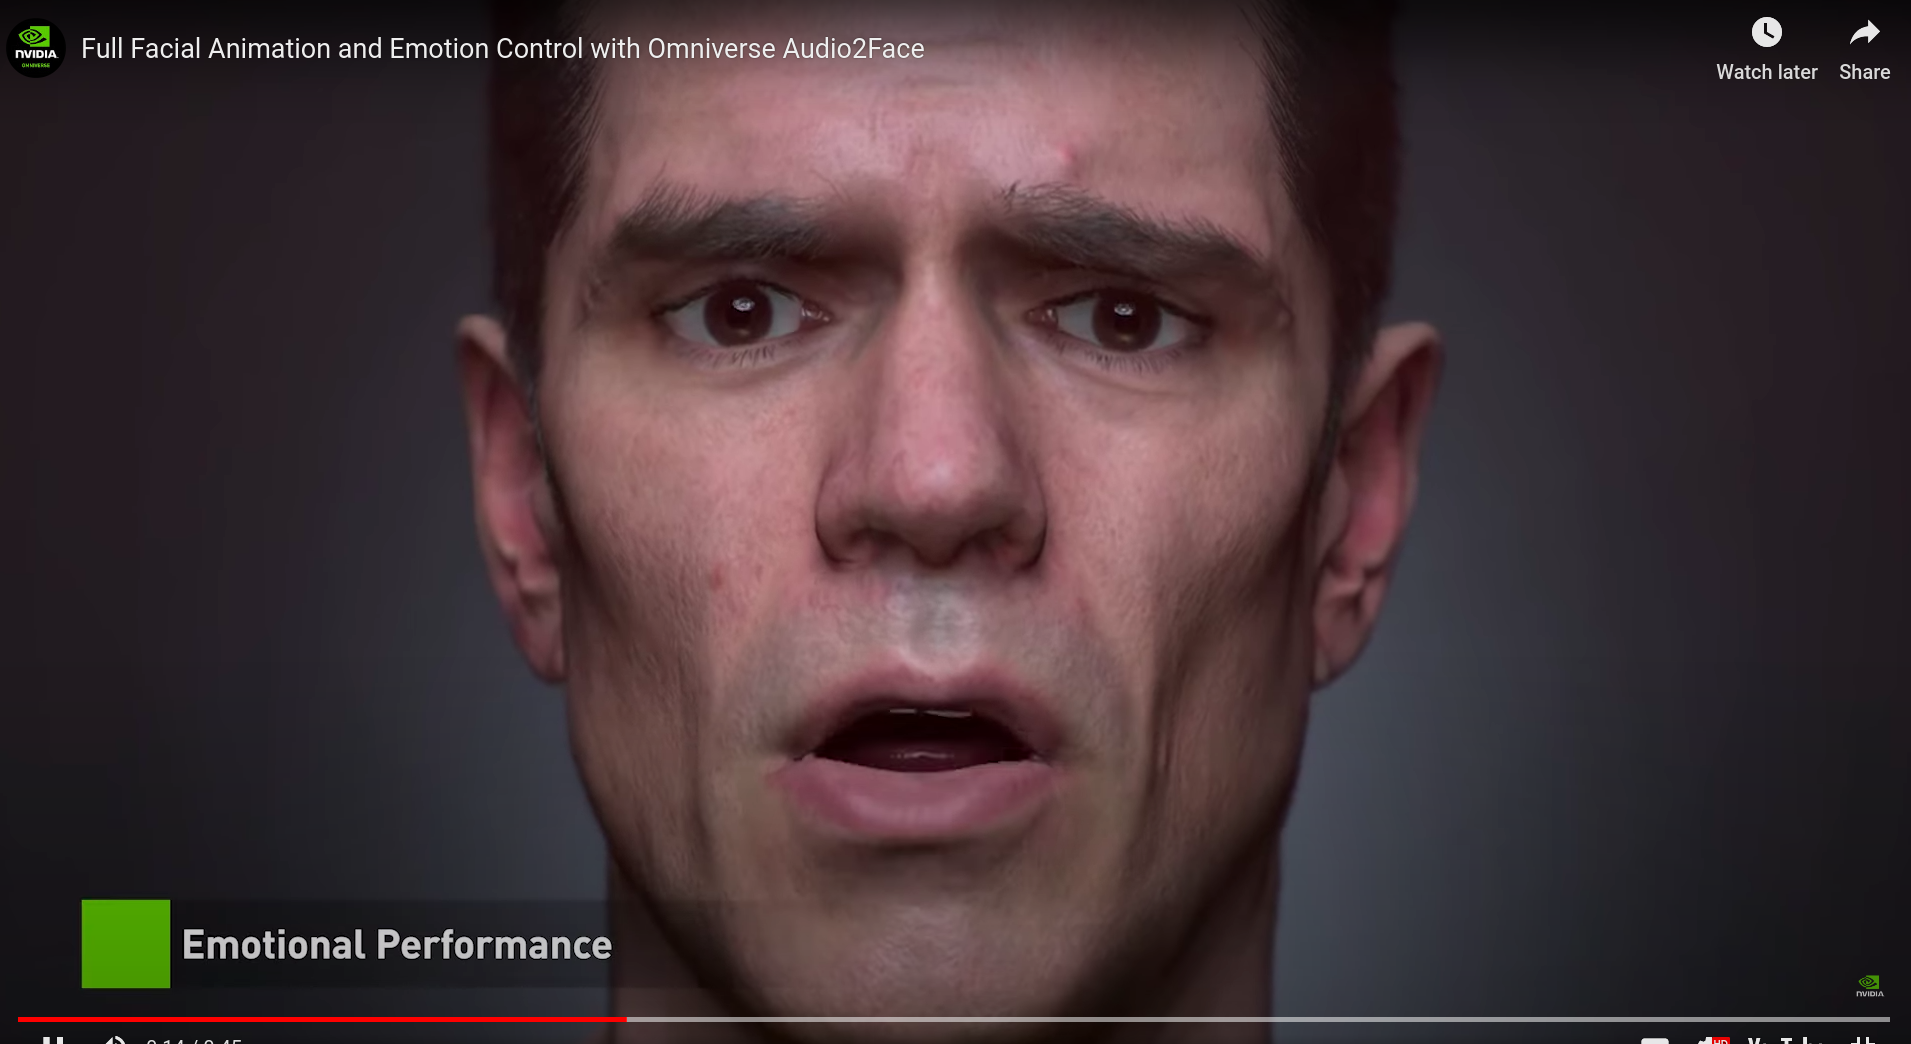

Việc tạo ra cử chỉ dáng người (Gesture Generation) phần lớn sm được tạo ra manual bằng Move.ai (quay bằng iPhone) để cache lại và chỉ cần inferece (sinh) cho những câu text phức tạp không có pattern sẵn.

http://move.ai/

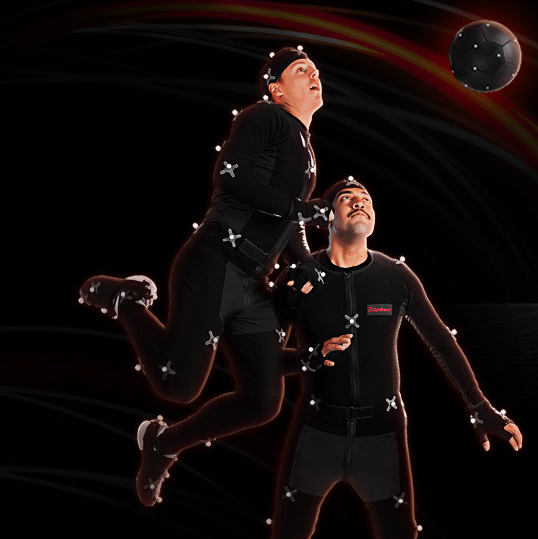

MOVE.AI là statup về việc thay vì dùng các Tracker để tracking trước đây trong ngành game thì họ sử dụng Iphone để Regconition cử động của nhân vật với độ chính xác cực cao, một studio nhỏ hoàn toàn có thể sử dụng để đạt kết quả tương đương với các studio lớn sử dụng nhiều Tracker



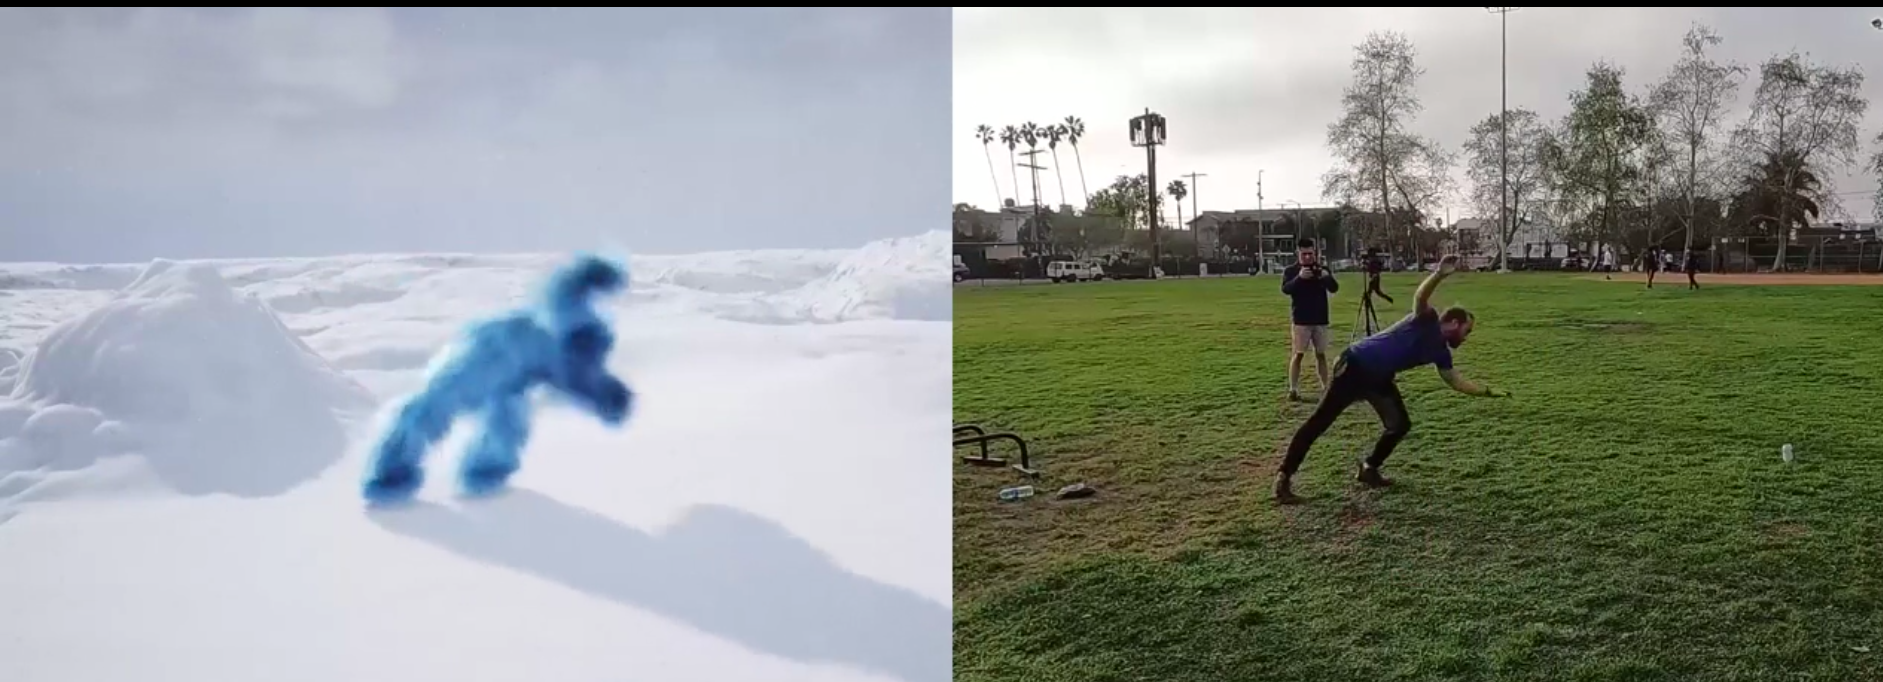

Việc sinh cử chỉ dáng người (Gesture Generation) có thể từ text hoặc bằng audio speech. Tuy nhiên text2gesture thì rất khó maching do không có đủ thông tin,
audio thì có được các thông tin về từng khoảng thời gian, sự lên xuống nên phù hợp hơn.


Vì vậy mục tiêu của em là xây dựng model AI để sinh gesture (cử chỉ dáng người) từ input đầu vào là audio speech.

## 1. Abstract

## 2. Introduction

## 3. Related work

## 4. Experiments

## 5. Conclusion